In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# function classes

class function_cubic:
    def __init__(self):
        print('Creating function: cubic')
        self.nroots = 3
        self.bounds = [-5,5]
          
    # compute function 
    def get_value(self,x):
        return 10.2-7.4*x-2.1*x*x+x*x*x
    
    # compute derivative
    def get_derivative(self,x):
        return -7.4-4.2*x+3*x*x

class function_exp:
    def __init__(self):
        print('Creating function: exponential')
        self.nroots = 1
        self.bounds = [-5,5]
       
    # compute function 
    def get_value(self,x):
        return np.exp(x)-2
    
    # compute derivative
    def get_derivative(self,x):
        return np.exp(x)
    
class function_sinusodial:
    def __init__(self):
        print('Creating function: sinusoidal')
        self.nroots = 4
        self.bounds = [0.1,4]
        
    # compute function
    def get_value(self,x):
        return np.cos(x)*np.sin(3*x)
    
    # compute derivative
    def get_derivative(self,x):
        return -np.sin(x)*np.sin(3*x)+3*np.cos(x)*np.cos(3*x)

In [89]:
# root finding algorithms

class step_bisection:
    def iterate(self,function,pair):
        centre = float(pair[0]+pair[1])/2
        # check whether points straddle root (could make it a function instead)
        if function.get_value(pair[1])*function.get_value(centre) < 0:
                return [centre,pair[1]] 
        else:
                return [pair[0],centre] 
        
# newton raphson
class step_nr:
    def iterate(self,function,pair):
        # holds the previous value in pair[1] for tolerance value calculation
        return [pair[0]-float(function.get_value(pair[0]))/function.get_derivative(pair[0]),pair[0]]

class step_secant:
    def iterate(self,function,pair):
        return [pair[1],pair[1]-function.get_value(pair[1])*((pair[1]-pair[0])/
                                float(function.get_value(pair[1])-function.get_value(pair[0])))]

# hybrid method creating by peter clarke, uses bisection & secant methods
class step_hybrid:
    def iterate(self,function,pair):
        # secant x2
        s = pair[1]-function.get_value(pair[1])*((pair[1]-pair[0])/
                    float(function.get_value(pair[1])-function.get_value(pair[0])))
        if pair[0] < s < pair[1]:
            x2 = s
        else:
            # bisection x2
            x2 = float(pair[0]+pair[1])/2
        # check whether points straddle root
        if function.get_value(pair[1])*function.get_value(x2) < 0:
                return [x2,pair[1]] 
        else:
                return [pair[0],x2] 

# dekkers method not suitable for the way this code is written
class step_dekkers:
    def iterate(self,function,pair):
        # requires 3 values, missing  b_k-1
        # would have to change stuff to get this in (don't want to)
        # secant 
        s = pair[1]-function.get_value(pair[1])*((pair[1]-pair[0])/
                    float(function.get_value(pair[1])-function.get_value(pair[0])))
        centre = float(pair[0]+pair[1])/2
        if (s > centre) or (s < pair[1]):
            # s is now the next pair[1]
            x2 = s
        else:
            x2 = centre
        if function.get_value(pair[0])*function.get_value(x2):
            return [pair[0],x2]
        else:
            return [pair[1],x2]
         

In [90]:
# bracket roots for a function given the number of roots
class bracket:
    def get_brackets(self,function,nintervals=6):
        # get bounds of the function
        bracket_range = function.bounds
        print('Bracket range '+str(bracket_range)+' Init number of intervals '+str(nintervals))
        # find where roots lie between
        n = 0
        iterations = 0 
        # do not do more than 3 iterations (time consuming calculations)
        while function.nroots > n or iterations > 3:
            n = 0
            brackets = []
            # calculate step sizes
            step_size = float(bracket_range[1]-bracket_range[0])/nintervals
            intervals = np.arange(bracket_range[0],bracket_range[1],step_size)

            for i in range(int(nintervals)-1):
                if function.get_value(intervals[i])*function.get_value(intervals[i+1]) < 0:
                    n += 1
                    brackets.append([intervals[i],intervals[i+1]])                    
            # function has failed to find all of the roots so we restart with smaller step sizes
            nintervals = nintervals*2
            iterations += 1

        return brackets                     

In [91]:
# engine to run everything
class engine:
    def __init__(self,function,step,title):
        self.function = function
        self.step = step
        self.title = title
        
    def run(self,tolerance,root_interval,nmax=100):
        # initiate results set
        results = [root_interval]
        
        # counter
        n = 0
        tol = 1.      
        # iterate algortihm
        while np.abs(tol) > tolerance:
            # perform and record calculation
            results.append(self.step.iterate(self.function,results[n]))
            n += 1
            tol = (results[n][1]-results[n][0])
            if n > nmax:
                print('Divergent with '+self.title)
                break
            
        #print('Engine has finished with '+self.title) 
        return results,n            

In [92]:
def main(in_function,tolerance,nint=9):
    
    print('Running root finder for '+in_function+' for an tolerance of '+str(tolerance))
        
    # create function
    if in_function == 'cubic':
        function = function_cubic()
    elif in_function == 'exp':
        function = function_exp()
    elif in_function == 'sin':
        function = function_sinusodial()
    else: 
        print('Incorrect function input')
        
    perform_bracketing = bracket()        
    brackets = perform_bracketing.get_brackets(function,nintervals=nint)
    
    # get results for each root
    print('There is '+str(len(brackets))+' roots to be found.')
    print(' ')
    
    # create objects
    bisection_step = step_bisection()
    bisection_engine = engine(function,bisection_step,'bisection method')
    
    nr_step = step_nr()
    nr_engine = engine(function,nr_step,'newton-raphson method')
    
    secant_step = step_secant()
    secant_engine = engine(function,secant_step,'secant method')
    
    hybrid_step = step_hybrid()
    hybrid_engine = engine(function,hybrid_step,'hybrid method')
    
    plt.figure(figsize=(20,10))
    plot_range = function.bounds
    plt.plot([x for x in np.arange(plot_range[0],plot_range[1],0.05)],
             [function.get_value(x) for x in np.arange(plot_range[0],plot_range[1],0.05)], label='function')
    plt.grid()
        
    # get root for each boundary in the brackets
    for row in brackets:
        # get results
        results_bisection,nb = bisection_engine.run(tolerance,row)
        results_nr,nr = nr_engine.run(tolerance,row)
        results_secant,ns = secant_engine.run(tolerance,row)
        results_hybrid,nh = hybrid_engine.run(tolerance,row)
        print('Bisection results: '+str(results_bisection[-1])+' with '+str(nb)+' iterations')
        print('Newton-raphson results: '+str(results_nr[-1])+' with '+str(nr)+' iterations')
        print('Secant results: '+str(results_secant[-1])+' with '+str(ns)+' iterations')
        print('Hybrid results: '+str(results_hybrid[-1])+' with '+str(nh)+' iterations')
        print(' ')
        plt.plot(results_bisection[-1][0],[0],'o',label='root')
    
    plt.legend()        

Running root finder for exp for an tolerance of 1e-05
Creating function: exponential
Bracket range [-5, 5] Init number of intervals 9
There is 1 roots to be found.
 
Bisection results: [0.6931389702690969, 0.6931474473741317] with 17 iterations
Newton-raphson results: [0.69314718055994529, 0.6931471817601168] with 4 iterations
Secant results: [0.69313912909424702, 0.69314717781595425] with 5 iterations
Hybrid results: [0.69314718055994495, 0.69314718055994529] with 39 iterations
 


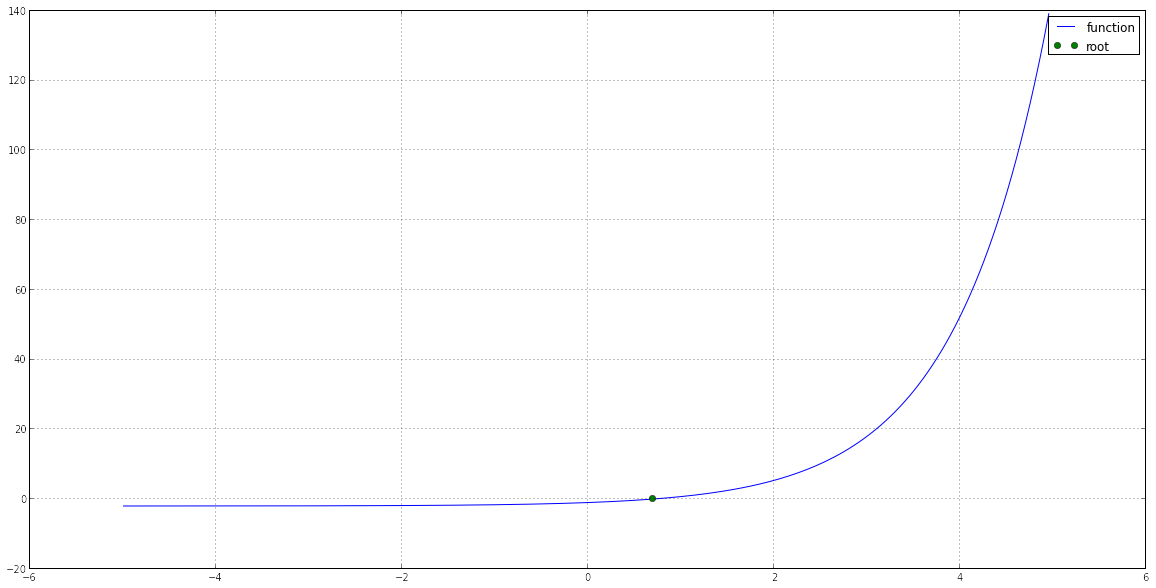

In [85]:
main('exp',0.00001)

Running root finder for cubic for an tolerance of 1e-05
Creating function: cubic
Bracket range [-5, 5] Init number of intervals 9
There is 3 roots to be found.
 
Bisection results: [-2.497711181640625, -2.49770270453559] with 17 iterations
Newton-raphson results: [-2.4977093657101457, -2.4977094240362816] with 4 iterations
Secant results: [-2.497709531367168, -2.4977093657026175] with 6 iterations
Hybrid results: [-2.4977093657101443, -2.4977093657101439] with 18 iterations
 
Bisection results: [1.2029520670572915, 1.2029605441623263] with 17 iterations
Newton-raphson results: [1.2029572837627935, 1.2029572836958282] with 4 iterations
Secant results: [1.2029573588332201, 1.2029572837619253] with 5 iterations
Hybrid results: [1.2029572837627935, 1.2029572837627938] with 15 iterations
 
Bisection results: [3.3947499593098964, 3.3947584364149312] with 17 iterations
Newton-raphson results: [3.3947520819473502, 3.3947520892004777] with 6 iterations
Secant results: [3.3947508829655395, 3.394

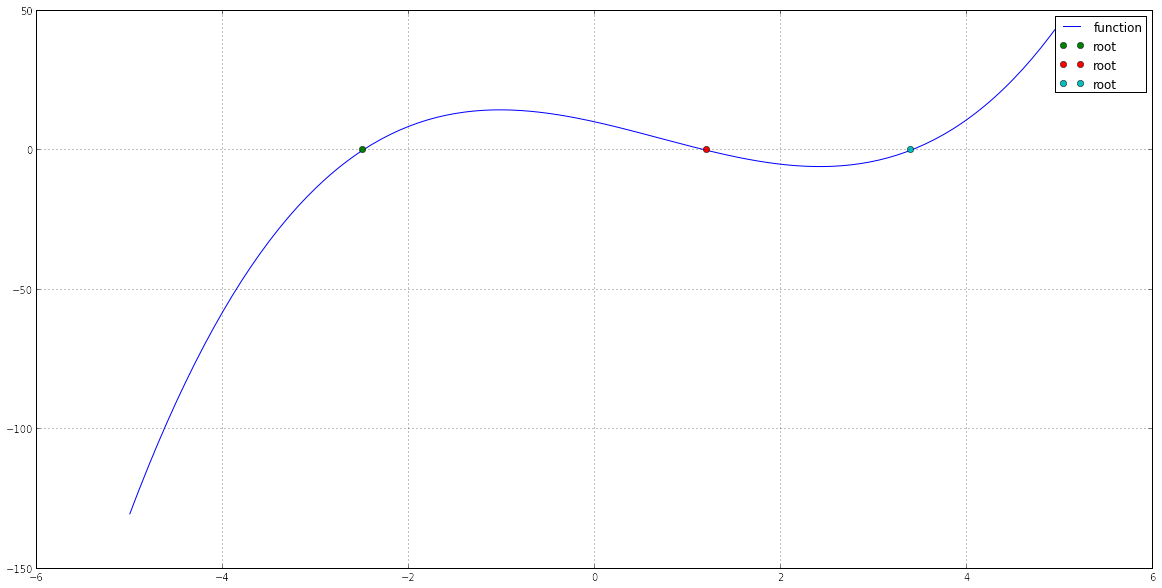

In [86]:
main('cubic',0.00001)

Running root finder for sin for an tolerance of 1e-05
Creating function: sinusoidal
Bracket range [0.1, 4] Init number of intervals 51
There is 4 roots to be found.
 
Bisection results: [1.0471916647518382, 1.0472009995404412] with 13 iterations
Newton-raphson results: [1.047197551182899, 1.0471947388764977] with 3 iterations
Secant results: [1.0471985982852754, 1.0471975516273198] with 4 iterations
Hybrid results: [1.0471903367209208, 1.0471975511965979] with 23 iterations
 
Bisection results: [1.5707892922794113, 1.5707986270680143] with 13 iterations
Newton-raphson results: [1.5707963267948966, 1.5707963267934806] with 3 iterations
Secant results: [1.5707930511304053, 1.5707963267955038] with 3 iterations
Hybrid results: [1.57079603084605, 1.5707963267949523] with 3 iterations
 
Bisection results: [2.094386919806984, 2.094396254595587] with 13 iterations
Newton-raphson results: [2.0943951023931957, 2.0943951104251299] with 3 iterations
Secant results: [2.0943951703853907, 2.09439510

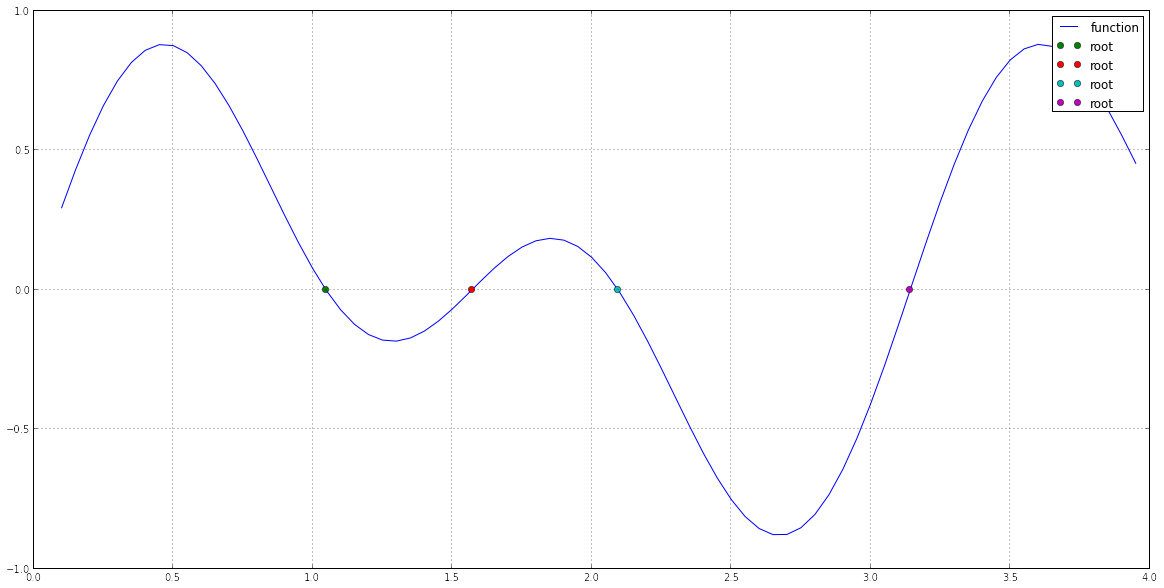

In [83]:
main('sin',0.00001,nint=51)

cfunction = function_cubic()
cnr_step = step_nr()
cnr_engine = engine(cfunction,cnr_step,'newton-raphson method')
cresults_nr,cnr = cnr_engine.run(0.00001,[3.39,3.1])
print('Newton-raphson results: '+str(cresults_nr[-1])+' with '+str(cnr)+' iterations')

val =3
if val < 2 or val > 4:
    print('True')
else:
    print('False')
        